<a href="https://colab.research.google.com/github/YASWADEEP/Data-Analysis/blob/main/Customer_segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install libraries
!pip install pandas numpy scikit-learn matplotlib seaborn


In [10]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [12]:
!git config --global credential.helper manager-core


In [14]:
!git clone https://github.com/YASWADEEP/Data-Analysis.git


fatal: destination path 'Data-Analysis' already exists and is not an empty directory.


In [19]:
#Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')



In [20]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


DATA PROCESSING

In [21]:
#Check for Missing Values
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [22]:
#Drop Irrelevant Columns
df = df.drop(['CustomerID'], axis=1)


In [23]:
#Encode Categorical Variables (if any)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [24]:
#Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


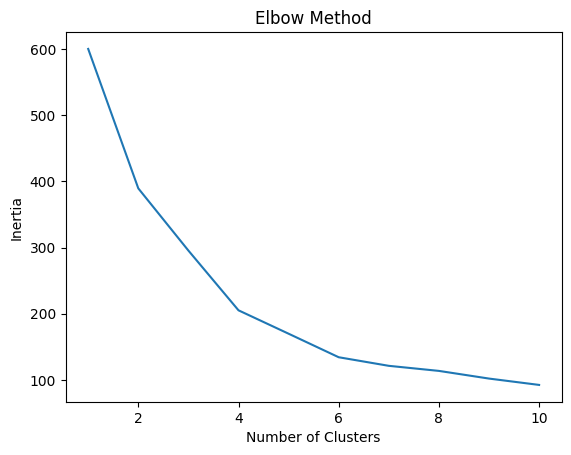

In [25]:
# Apply K-Means Clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [26]:
#Fit the K-Means Model
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


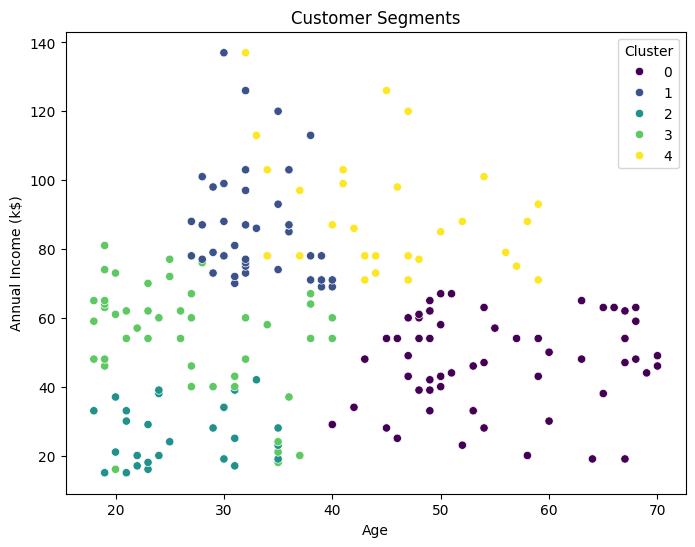

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


In [28]:
# Analyze and Interpret the Clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.568966  55.275862           47.620690               41.706897
1        0.550000  32.875000           86.100000               81.525000
2        0.576923  25.769231           26.115385               74.846154
3        0.600000  26.733333           54.311111               40.911111
4        0.483871  44.387097           89.774194               18.483871


In [29]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [32]:
!df.to_csv('/content/Mall_Customers.csv'), index=False

/bin/bash: -c: line 1: syntax error near unexpected token `'/content/Mall_Customers.csv''
/bin/bash: -c: line 1: `df.to_csv('/content/Mall_Customers.csv'), index=False'
